In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

from models import *
from data_split import *

## Data Loading

In [2]:
data = pickle.load(open(r'../Data/deltaQ_cycles_v3.pkl', 'rb'))
# data2 = pickle.load(open(r'../Data/temp_features.pkl', 'rb'))

In [3]:
n_cycles = 98
cut_start = 1

features = [
    "DeltaQ_logVars",
    # "DeltaQ_mins",
    # "DeltaQ_means",
    "DeltaT_max",
    # "DeltaT_var",
]

n_cycles = n_cycles - cut_start
y = np.zeros(124)
x = np.zeros((124, n_cycles*len(features)))

for i, cell in enumerate(data.keys()):
    for j, feature in enumerate(features):
        x[i, j*n_cycles:(j+1)*n_cycles] = data[cell][feature][cut_start:]
    y[i] = np.log10(data[cell]["cycle_life"])

# convert to tensors and concatenate features and labels
x = torch.Tensor(x)
y = torch.Tensor(y)

## Autoencoder multi-stage training


Stage 1:

Epoch 200/2000, 	decoding loss: 89.94,  	prediction loss: 229.71,  	reg_loss: 12.51
Epoch 400/2000, 	decoding loss: 72.14,  	prediction loss: 137.15,  	reg_loss: 12.01
Epoch 600/2000, 	decoding loss: 53.11,  	prediction loss: 105.62,  	reg_loss: 11.52
Epoch 800/2000, 	decoding loss: 35.40,  	prediction loss: 83.72,  	reg_loss: 11.07
Epoch 1000/2000, 	decoding loss: 20.94,  	prediction loss: 70.27,  	reg_loss: 10.67
Epoch 1200/2000, 	decoding loss: 11.53,  	prediction loss: 60.51,  	reg_loss: 10.28
Epoch 1400/2000, 	decoding loss: 6.41,  	prediction loss: 51.17,  	reg_loss: 9.88
Epoch 1600/2000, 	decoding loss: 4.01,  	prediction loss: 45.24,  	reg_loss: 9.53
Epoch 1800/2000, 	decoding loss: 2.89,  	prediction loss: 41.08,  	reg_loss: 9.19
Epoch 2000/2000, 	decoding loss: 2.35,  	prediction loss: 37.77,  	reg_loss: 8.85

train 	 61.445602
test 	 115.10139
sec 	 373.5781


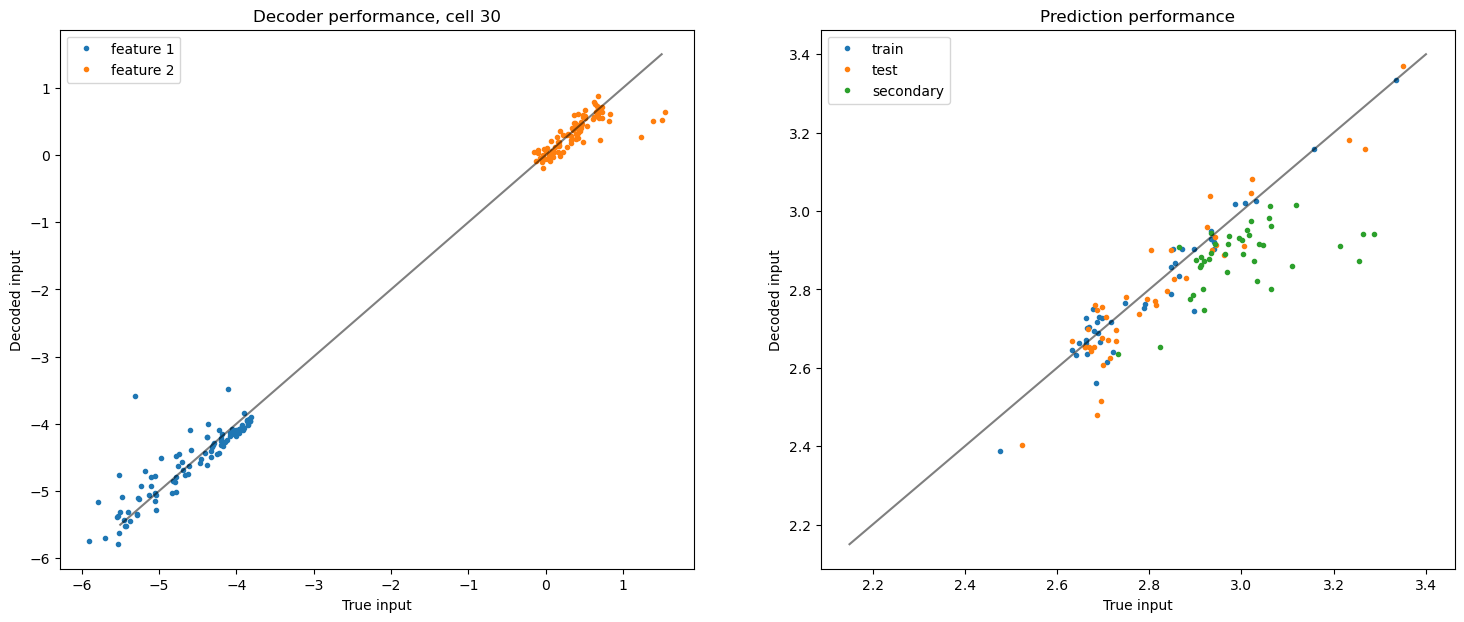


Stage 2:

Epoch 60/600, 	decoding loss: 0.23,  	prediction loss: 36.79,  	reg_loss: 0.88
Epoch 120/600, 	decoding loss: 0.22,  	prediction loss: 35.67,  	reg_loss: 0.88
Epoch 180/600, 	decoding loss: 0.21,  	prediction loss: 34.55,  	reg_loss: 0.87
Epoch 240/600, 	decoding loss: 0.21,  	prediction loss: 33.46,  	reg_loss: 0.87
Epoch 300/600, 	decoding loss: 0.21,  	prediction loss: 32.35,  	reg_loss: 0.87
Epoch 360/600, 	decoding loss: 0.20,  	prediction loss: 31.35,  	reg_loss: 0.87
Epoch 420/600, 	decoding loss: 0.20,  	prediction loss: 30.41,  	reg_loss: 0.86
Epoch 480/600, 	decoding loss: 0.20,  	prediction loss: 29.51,  	reg_loss: 0.86
Epoch 540/600, 	decoding loss: 0.20,  	prediction loss: 28.62,  	reg_loss: 0.86
Epoch 600/600, 	decoding loss: 0.20,  	prediction loss: 27.76,  	reg_loss: 0.86

train 	 52.671333
test 	 121.118454
sec 	 388.39798


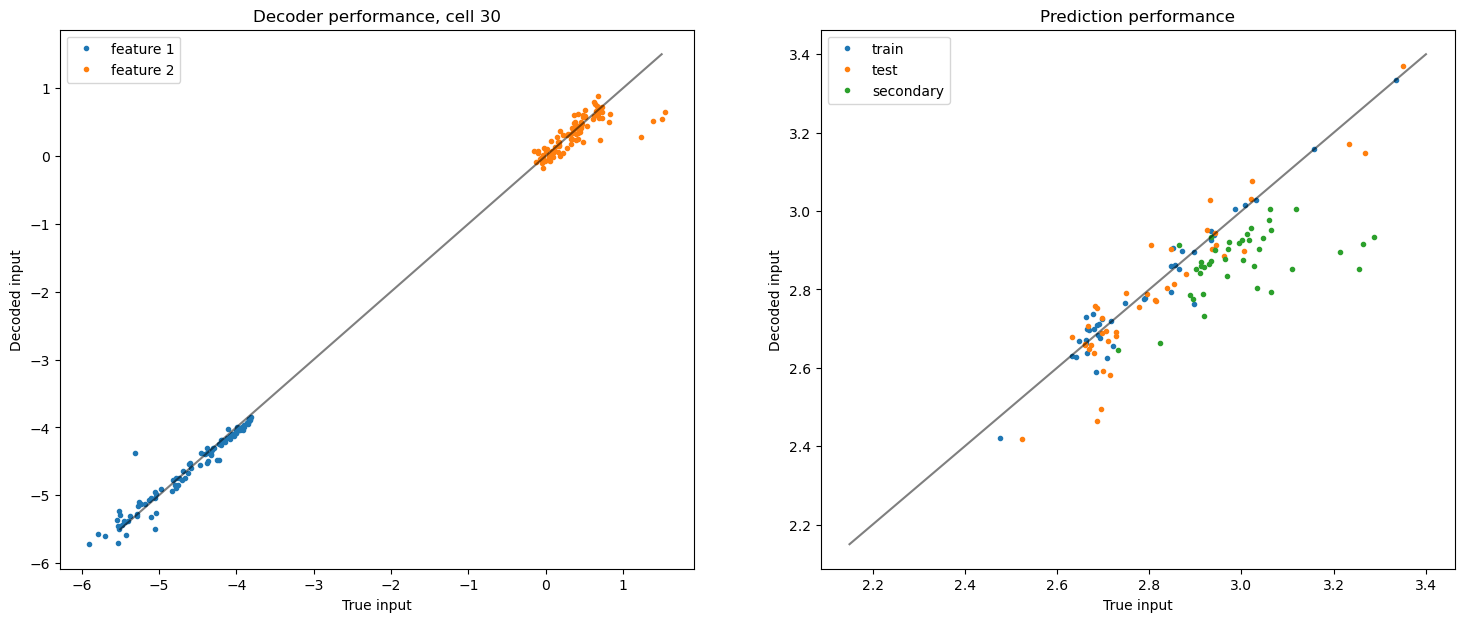

In [5]:
# del model

train_policy = {
    "num_stages": 2,
    "epochs": [2000, 600],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.01, 0.01],
    "decoding_weights": [10, 1],
    "en_weights": [0.1, 0.1]
}


model = AutoEncoder_ElasticNet(n_features=len(features), n_cycles=n_cycles)
# model.fit(train_dataset, decoding_weight=10)
# model.fit(train_dataset, prediction_weight=0.0001, decoding_weight=1, lr = 1e-5, epochs=1000)
model.fit(x, y, train_policy)

## Decoder performance on other cells

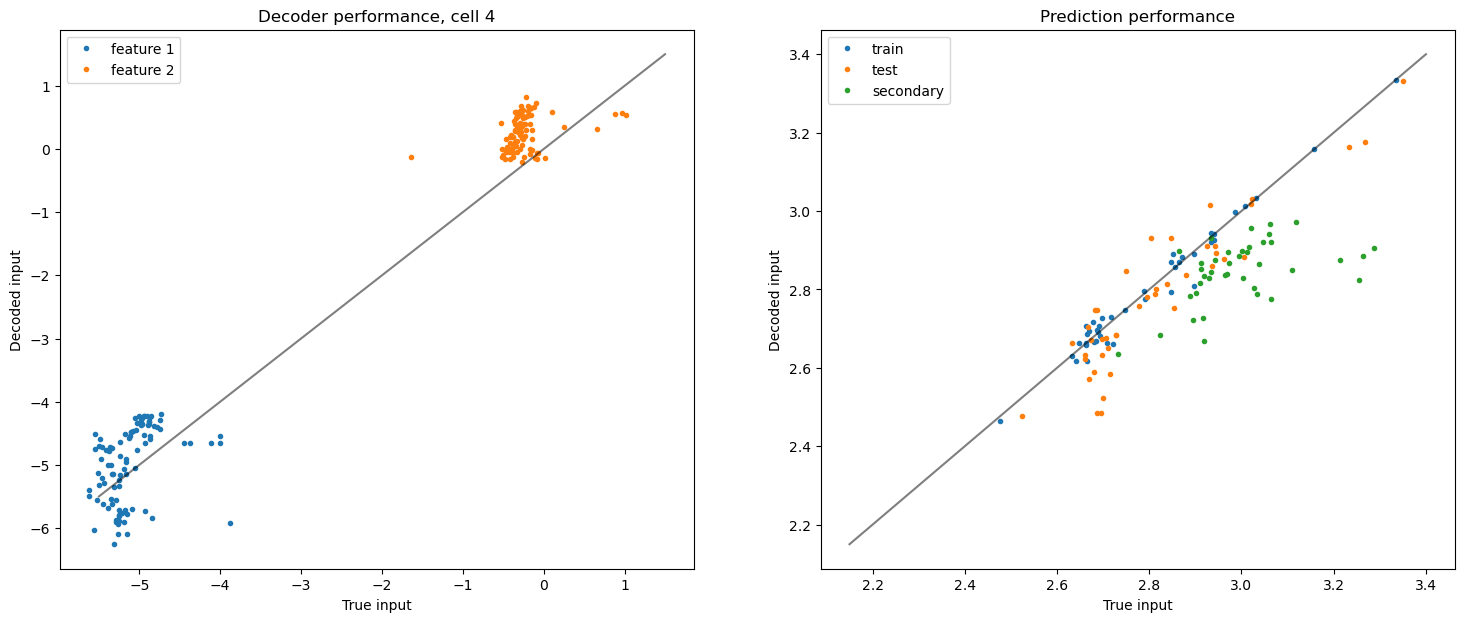

In [15]:
model.plotter(x, y, 4)

In [68]:
np.argmin(y)

tensor(42)

## Autoencoder with individual features

Stage 1:

Epoch 200/2000, 	decoding loss: 94.86,    	prediction loss: 5249.18,  	reg_loss: 14.44
Epoch 400/2000, 	decoding loss: 72.83,    	prediction loss: 349.52,  	reg_loss: 14.47
Epoch 600/2000, 	decoding loss: 57.43,    	prediction loss: 139.96,  	reg_loss: 14.28
Epoch 800/2000, 	decoding loss: 44.21,    	prediction loss: 115.66,  	reg_loss: 14.04
Epoch 1000/2000, 	decoding loss: 32.99,    	prediction loss: 100.60,  	reg_loss: 13.79
Epoch 1200/2000, 	decoding loss: 23.88,    	prediction loss: 88.73,  	reg_loss: 13.55
Epoch 1400/2000, 	decoding loss: 16.80,    	prediction loss: 78.08,  	reg_loss: 13.36
Epoch 1600/2000, 	decoding loss: 11.65,    	prediction loss: 68.95,  	reg_loss: 13.18
Epoch 1800/2000, 	decoding loss: 8.15,    	prediction loss: 61.67,  	reg_loss: 13.02
Epoch 2000/2000, 	decoding loss: 5.78,    	prediction loss: 55.28,  	reg_loss: 12.86

train 	 [74.32983]
test 	 [100.43551]
sec 	 [301.47656]


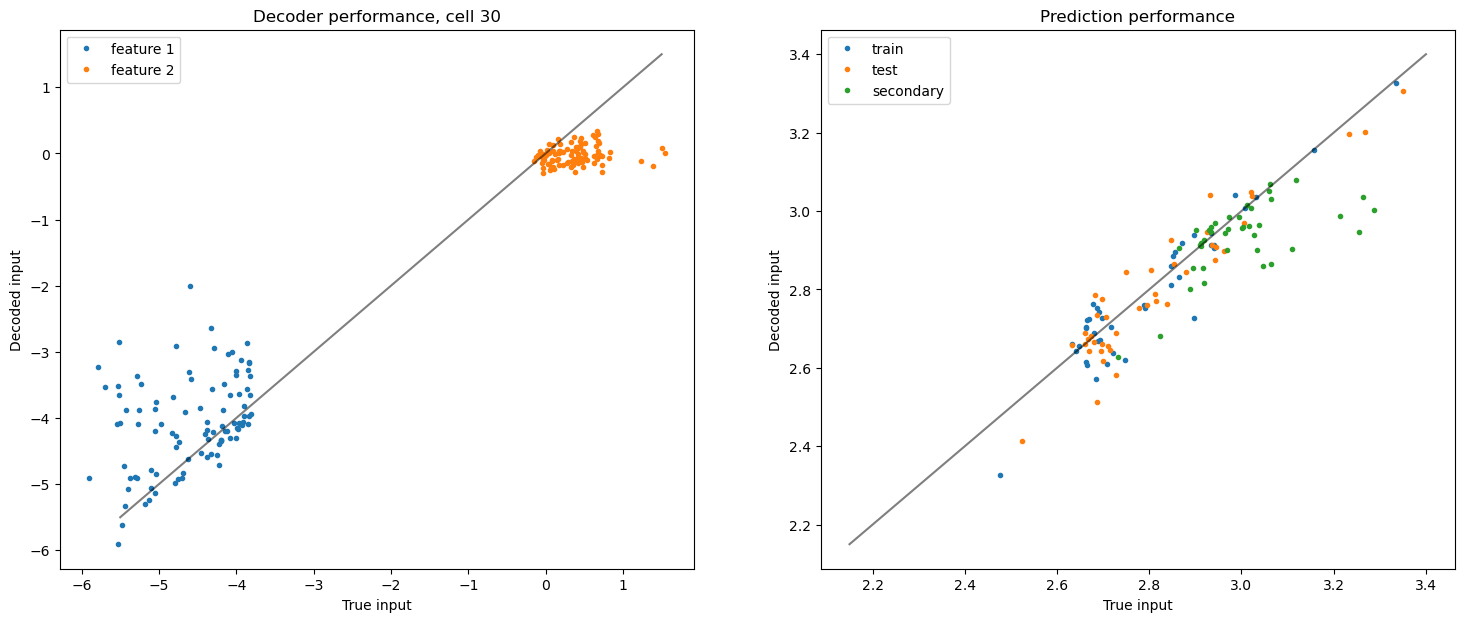

Stage 2:

Epoch 100/1000, 	decoding loss: 0.53,    	prediction loss: 51.66,  	reg_loss: 1.29
Epoch 200/1000, 	decoding loss: 0.49,    	prediction loss: 47.99,  	reg_loss: 1.29
Epoch 300/1000, 	decoding loss: 0.45,    	prediction loss: 44.58,  	reg_loss: 1.29
Epoch 400/1000, 	decoding loss: 0.42,    	prediction loss: 41.50,  	reg_loss: 1.30
Epoch 500/1000, 	decoding loss: 0.39,    	prediction loss: 38.68,  	reg_loss: 1.30
Epoch 600/1000, 	decoding loss: 0.37,    	prediction loss: 36.13,  	reg_loss: 1.31
Epoch 700/1000, 	decoding loss: 0.35,    	prediction loss: 33.94,  	reg_loss: 1.31
Epoch 800/1000, 	decoding loss: 0.33,    	prediction loss: 31.99,  	reg_loss: 1.32
Epoch 900/1000, 	decoding loss: 0.31,    	prediction loss: 30.23,  	reg_loss: 1.32
Epoch 1000/1000, 	decoding loss: 0.29,    	prediction loss: 28.57,  	reg_loss: 1.33

train 	 [53.432934]
test 	 [109.24211]
sec 	 [314.44318]


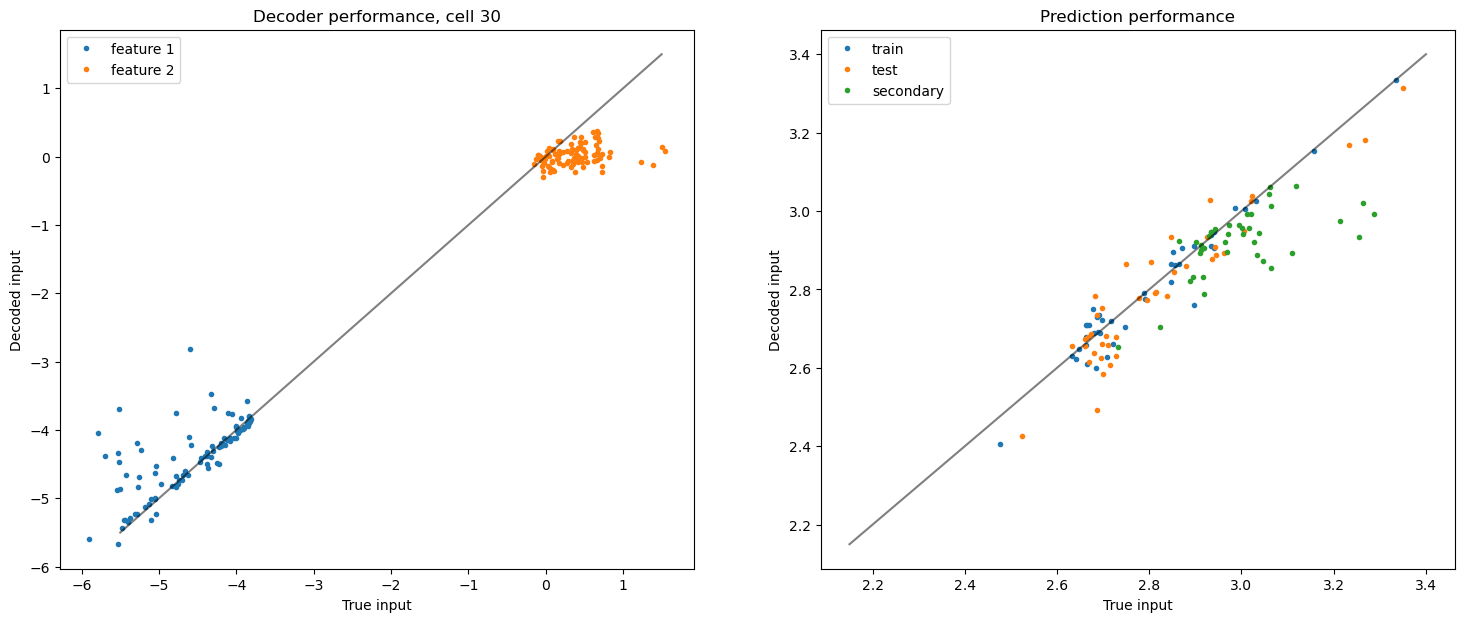

In [4]:
train_policy = {
    "num_stages": 2,
    "epochs": [2000, 1000],
    "learning_rates": [3e-5, 1e-5],
    "batch_sizes": [64, 64],
    "prediction_weights": [0.01, 0.01],
    "decoding_weights": [10, 1],
    "en_weights": [0.1, 0.1]
}


model_individual = AutoEncoder_Individual(n_features=2, n_cycles=n_cycles)
model_individual.fit(x, y, train_policy)

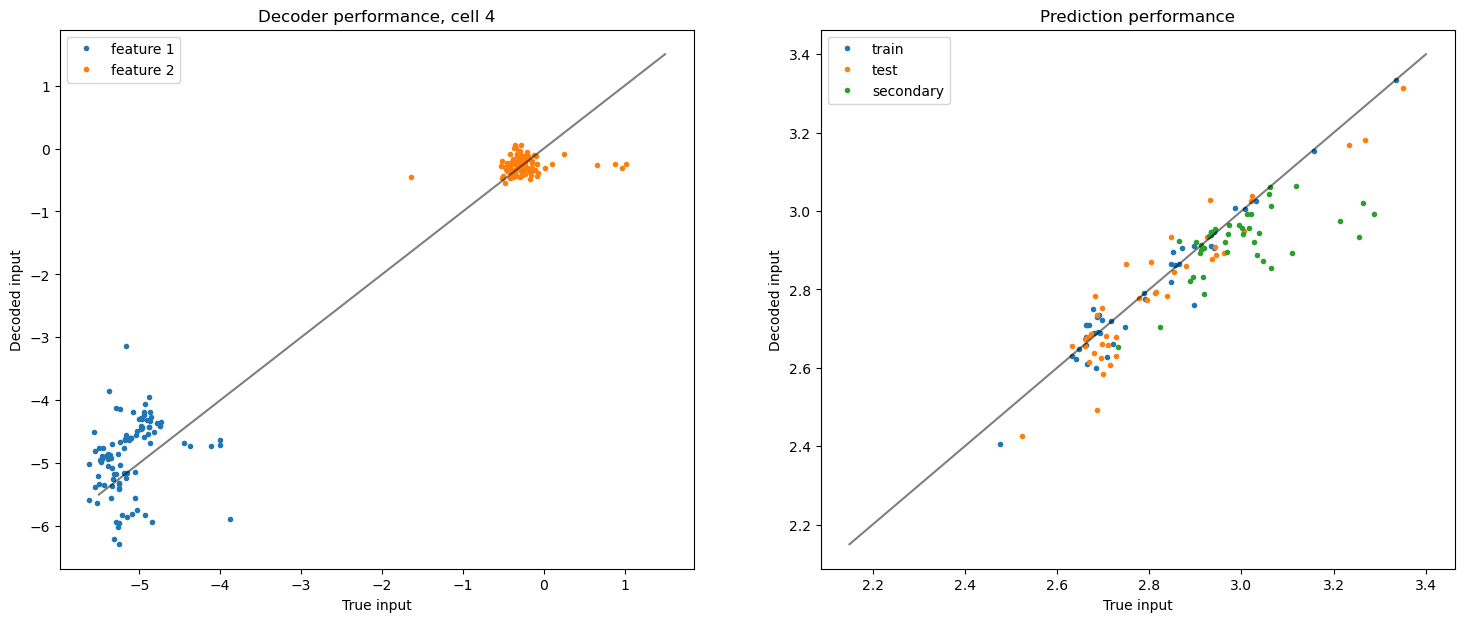

In [5]:
model_individual.plotter(x, y, 4)